# Social Media Analytics - Group Project 

###### Group 5: Salma BARKETALLAH, Ndjaidoukmi KEDA, Noémie GAUTIER

Company: Google

                  In this notebook, tweets mentionning google will be analyzed (this contains @, #, and direct mentions)

In [1]:
options(warnings = -1)

In [2]:
# Getting tokens from the doc created:
source("tokens.R")

###  Loading the required packages 

In [1]:
# Install rtweet package:
if(!require("rtweet")) install.packages("rtweet", quiet=TRUE); library("rtweet", quiet=TRUE)
# Install Other packages:
for (i in c('topicmodels','ggplot2','readr','SnowballC','slam','tm','Matrix','tidytext','dplyr','hunspell','purrr','wordcloud','RWeka')){
  if (!require(i, character.only=TRUE)) install.packages(i, repos = "http://cran.us.r-project.org", quiet=TRUE)
  require(i, character.only=TRUE, quiet=TRUE)
}
library(tidyverse, quiet=TRUE)


Loading required package: rtweet
Warning message:
"package 'rtweet' was built under R version 3.6.3"Loading required package: topicmodels
Warning message:
"package 'topicmodels' was built under R version 3.6.3"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Loading required package: readr
Warning message:
"package 'readr' was built under R version 3.6.3"Loading required package: SnowballC
Warning message:
"package 'SnowballC' was built under R version 3.6.3"Loading required package: slam
Warning message:
"package 'slam' was built under R version 3.6.3"Loading required package: tm
Warning message:
"package 'tm' was built under R version 3.6.3"Loading required package: NLP
Warning message:
"package 'NLP' was built under R version 3.6.3"
Attaching package: 'NLP'

The following object is masked from 'package:ggplot2':

    annotate

Loading required package: Matrix
Warning message:
"package 'Matrix' was built under R version 3.6.3"Loadi

package 'RWeka' successfully unpacked and MD5 sums checked


Warning message:
"package 'RWeka' was built under R version 3.6.3"Error: package or namespace load failed for 'RWeka':
 .onLoad failed in loadNamespace() for 'rJava', details:
  call: fun(libname, pkgname)
  error: JAVA_HOME cannot be determined from the Registry
Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v tibble  3.0.3     v stringr 1.4.0
v tidyr   1.1.2     v forcats 0.5.0
Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'stringr' was built under R version 3.6.3"Warning message:
"package 'forcats' was built under R version 3.6.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x NLP::annotate()  masks ggplot2::annotate()
x tidyr::expand()  masks Matrix::expand()
x dplyr::filter()  masks stats::filter()
x purrr::flatten() masks rtweet::fl

#### Loading the CSV file:

###### Tweets About Google:

In [2]:
#all tweets mentioning google
google_tweets <- read_csv("google_tweets.csv", col_types = cols())

#### Data pre-processing

In [4]:
# View tweets from Google:
head(google_tweets, n=2)
nrow(google_tweets)

user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,...,statuses_count,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url
x123041474,x1222670759555784704,2020-01-29 23:59:59,macbeestje,"Google is reportedly launching another messaging app, but this time might be different https://t.co/bm8al80ro1 via @mashable",Twitter Web Client,NA,NA,NA,NA,...,417842,316,2010-03-14 19:56:55,FALSE,NA,NA,NA,https://pbs.twimg.com/profile_banners/123041474/1368749867,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/760542530018553857/o6gd_RbR_normal.jpg
x2387910714,x1222670756741570561,2020-01-29 23:59:59,Jordaan_long,"we are bad at making decisions so we’ve decided to let you decide what songs are played on our headliner which is 3 weeks away so, you know, choose quickly https://t.co/HFcTHDo58a",Twitter for iPhone,NA,NA,NA,NA,...,2671,2816,2014-03-13 21:21:18,FALSE,NA,NA,NA,https://pbs.twimg.com/profile_banners/2387910714/1555197203,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1255282812820819970/wIwXaceD_normal.jpg


[1] 1200

###### Remove Punctuation

In [5]:
#Remove punctiation
google_tweets <- mutate(google_tweets, text = gsub(x = text, pattern = "[0-9]+|[[:punct:]]|\\(.*\\)", replacement = ""))

###### Tokenization

In [6]:
google_tweets_tokenized <- google_tweets %>% unnest_tokens(output = "word", # how should the new column be named?
                                             input = text, # where can we find the text? 
                                             token = "words", # which tokenization scheme should we follow?
                                             drop=FALSE,to_lower=TRUE) # drop=FALSE specifies that we want to keep our text; to_lower = lowercase
nrow(google_tweets_tokenized)

[1] 30028

###### Remove Unwanted Symbols and Words

In [7]:
#Remove # and @
google_tweets_tokenized <- filter(google_tweets_tokenized , substr(word, 1, 1) != '#', 
                         substr(word, 1, 1) != '@') # This compares for the first letter of a token # omit hashtags
nrow(google_tweets_tokenized)

[1] 30028

###### Remove stopwords

In [9]:
#Remove Stop words:
google_tweets_tokenized <- google_tweets_tokenized %>% anti_join(get_stopwords()) # note that we continued with the 'uncorrected' words here
nrow(google_tweets_tokenized)

# this reduces the amount of words by 10,000

ERROR: Error in loadNamespace(name): there is no package called 'stopwords'


###### Stemming/Lemmatization

In [10]:
#Stemming:
google_tweets_stemming<- google_tweets_tokenized %>% mutate(word = wordStem(word)) 

# again named it differently so we can see the difference

###### Document-term matrix

In [11]:
head(google_tweets_tokenized)

user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,...,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url,word
x123041474,x1222670759555784704,2020-01-29 23:59:59,macbeestje,Google is reportedly launching another messaging app but this time might be different httpstcobmalro via mashable,Twitter Web Client,NA,NA,NA,NA,...,316,2010-03-14 19:56:55,FALSE,NA,NA,NA,https://pbs.twimg.com/profile_banners/123041474/1368749867,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/760542530018553857/o6gd_RbR_normal.jpg,google
x123041474,x1222670759555784704,2020-01-29 23:59:59,macbeestje,Google is reportedly launching another messaging app but this time might be different httpstcobmalro via mashable,Twitter Web Client,NA,NA,NA,NA,...,316,2010-03-14 19:56:55,FALSE,NA,NA,NA,https://pbs.twimg.com/profile_banners/123041474/1368749867,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/760542530018553857/o6gd_RbR_normal.jpg,is
x123041474,x1222670759555784704,2020-01-29 23:59:59,macbeestje,Google is reportedly launching another messaging app but this time might be different httpstcobmalro via mashable,Twitter Web Client,NA,NA,NA,NA,...,316,2010-03-14 19:56:55,FALSE,NA,NA,NA,https://pbs.twimg.com/profile_banners/123041474/1368749867,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/760542530018553857/o6gd_RbR_normal.jpg,reportedly
x123041474,x1222670759555784704,2020-01-29 23:59:59,macbeestje,Google is reportedly launching another messaging app but this time might be different httpstcobmalro via mashable,Twitter Web Client,NA,NA,NA,NA,...,316,2010-03-14 19:56:55,FALSE,NA,NA,NA,https://pbs.twimg.com/profile_banners/123041474/1368749867,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/760542530018553857/o6gd_RbR_normal.jpg,launching
x123041474,x1222670759555784704,2020-01-29 23:59:59,macbeestje,Google is reportedly launching another messaging app but this time might be different httpstcobmalro via mashable,Twitter Web Client,NA,NA,NA,NA,...,316,2010-03-14 19:56:55,FALSE,NA,NA,NA,https://pbs.twimg.com/profile_banners/123041474/1368749867,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/760542530018553857/o6gd_RbR_normal.jpg,another
x123041474,x1222670759555784704,2020-01-29 23:59:59,macbeestje,Google is reportedly launching another messaging app but this time might be different httpstcobmalro via mashable,Twitter Web Client,NA,NA,NA,NA,...,316,2010-03-14 19:56:55,FALSE,NA,NA,NA,https://pbs.twimg.com/profile_banners/123041474/1368749867,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/760542530018553857/o6gd_RbR_normal.jpg,messaging


In [12]:
# the number of times a word occurred in each tweet
google_tweets_tokenized <- google_tweets_tokenized %>% count(status_id,word)
head(google_tweets_tokenized)

status_id,word,n
x1222670515724222470,bruno,1
x1222670515724222470,fernandes,1
x1222670515724222470,google,1
x1222670515724222470,httpstcobupruxbxoo,1
x1222670515724222470,is,1
x1222670515724222470,this,1


###### Inspect the text

In [13]:
# investigate the most frequent terms
tweets_google_freq <- google_tweets_tokenized %>% group_by(word) %>% # for this, we need to have the sum over all documents
                      summarize(freq = n()) %>%
                      arrange(-freq)                  # arrange = order; from most frequent term to lowest frequent
head(tweets_google_freq)

`summarise()` ungrouping output (override with `.groups` argument)


word,freq
google,630
the,574
to,567
a,392
and,390
of,354


###### Removing https and t.co:

In [14]:
# create a tibble with unwanted words (we took google out as obviously all thee twets contian the word google)
tco <- tibble("word"= c("t.co", "https","google"))
tco

word
t.co
https
google


In [20]:
head(google_tweets_tokenized, n=2)

status_id,word,n
<chr>,<chr>,<int>
x1222670515724222470,bruno,1
x1222670515724222470,fernandes,1


In [15]:
# remove unwanted words
google_tweets_tokenized <- google_tweets_tokenized %>%anti_join(tco)
head(google_tweets_tokenized)

Joining, by = "word"


status_id,word,n
x1222670515724222470,bruno,1
x1222670515724222470,fernandes,1
x1222670515724222470,httpstcobupruxbxoo,1
x1222670515724222470,is,1
x1222670515724222470,this,1
x1222670515724222470,to,1


In [21]:
tweets_google_freq <- tweets_google_freq %>% anti_join(tco)
head(tweets_google_freq)

Joining, by = "word"



word,freq
<chr>,<int>
can,156
amp,103
just,87
now,83
like,73
make,69


###### Making WorldClouds:

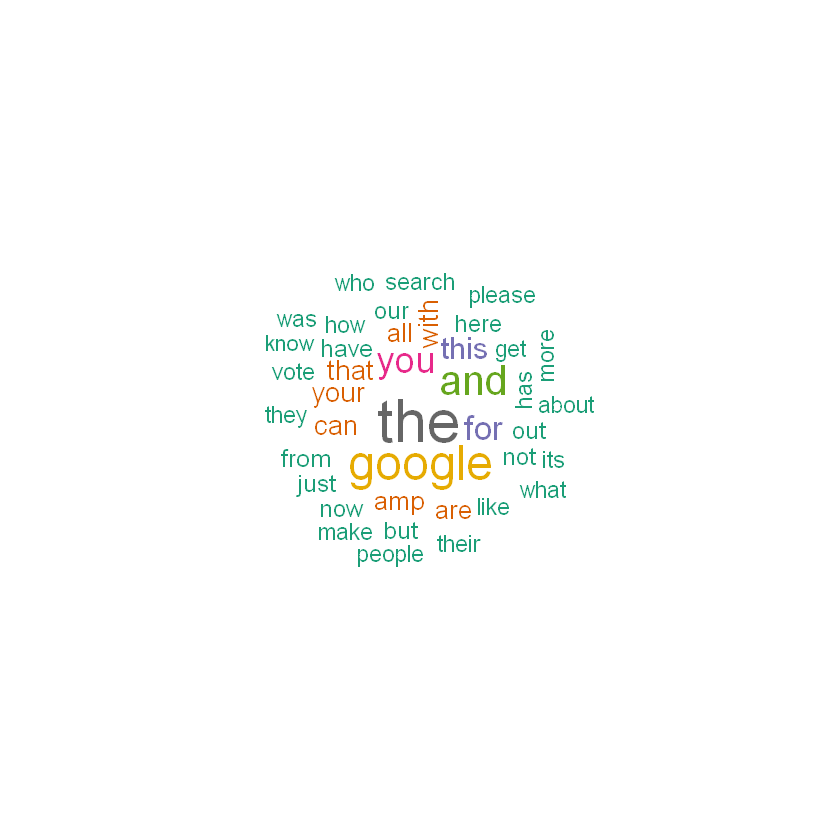

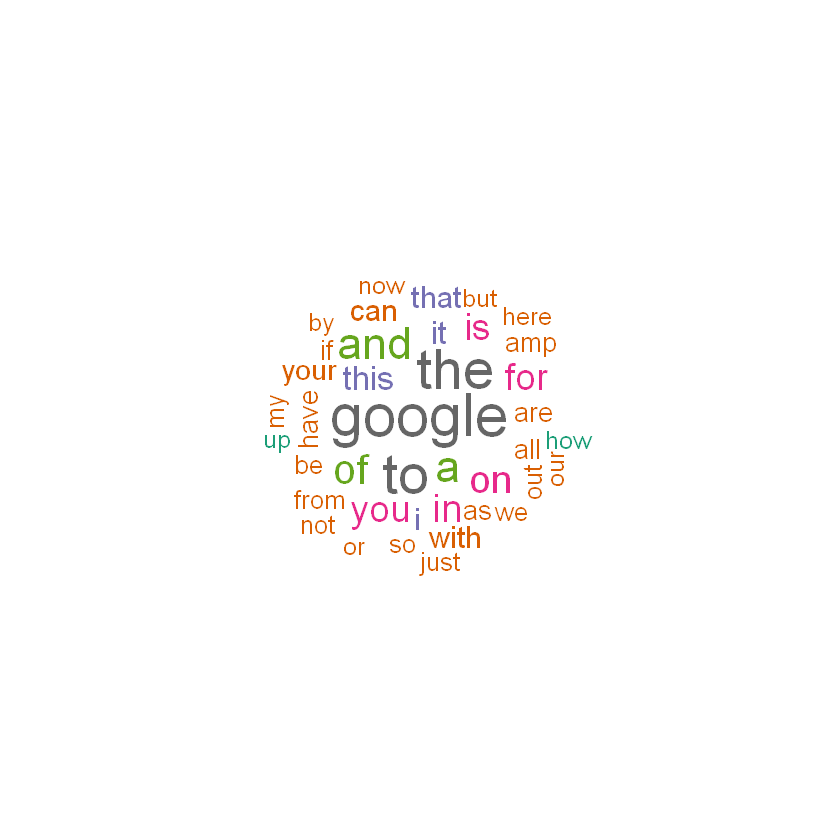

In [16]:
# Word cloud based on the original text with no preprocessing
tf <- termFreq(google_tweets$text)
wordcloud(names(tf),tf,
          max.words=40,
          scale=c(3,1),
          random.order=FALSE,
          colors=brewer.pal(8, "Dark2"))

# Word cloud based on the pre-processing
wordcloud(tweets_google_freq$word, tweets_google_freq$freq,
          max.words=40,
          scale=c(3,1),
          random.order=FALSE,
          colors=brewer.pal(8, "Dark2"))

Selecting by freq


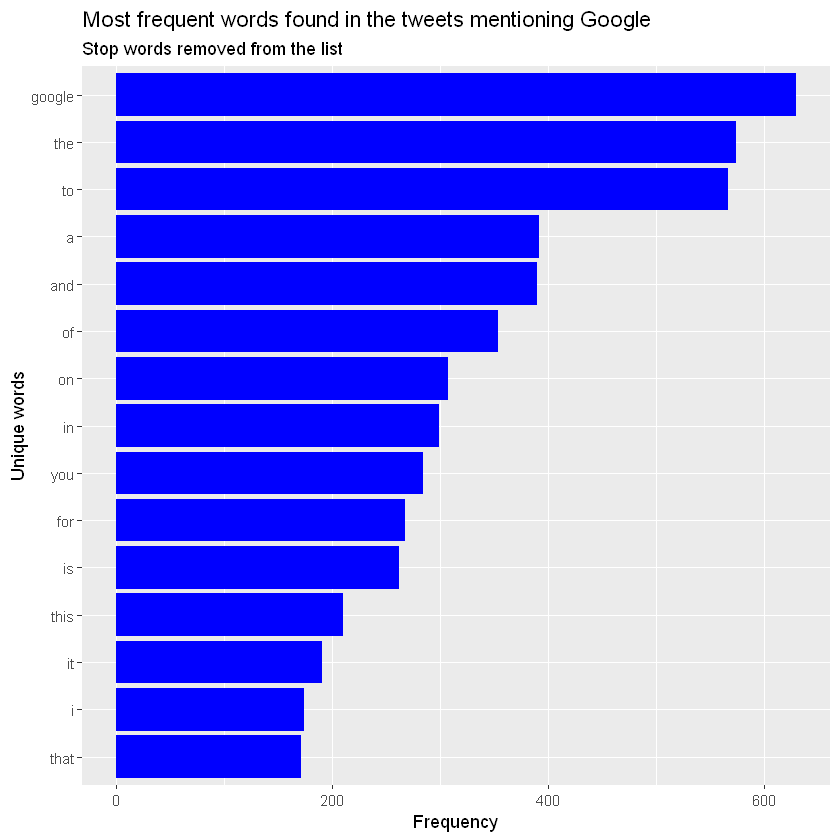

In [17]:
# bar chart of the most frequent words found in the tweets
tweets_google_freq %>% 
  top_n(15) %>%
  mutate(word = reorder(word, freq)) %>%
  ggplot(aes(x = word, y = freq)) +
  geom_col(fill="blue") +
  xlab(NULL) +
  coord_flip() +
  labs(y = "Frequency",
       x = "Unique words",
       title = "Most frequent words found in the tweets mentioning Google",
       subtitle = "Stop words removed from the list")

In [18]:
# Creating the Document Term Matrix with integrated tfidf
tweets_google_DTM <- google_tweets_tokenized %>%
                     count(status_id,word, sort=TRUE)%>%
                     cast_dtm(document = status_id, term = word,
                     value = n, weighting = tm::weightTf)
tweets_google_DTM

<<DocumentTermMatrix (documents: 1200, terms: 7833)>>
Non-/sparse entries: 26561/9373039
Sparsity           : 100%
Maximal term length: 90
Weighting          : term frequency (tf)

In [24]:
# let's inspect this matrix's structure
str(tweets_google_DTM )

List of 6
 $ i       : int [1:26561] 1 1 1 1 7 32 33 36 38 42 ...
 $ j       : int [1:26561] 1 2 3 4 4 4 4 4 4 4 ...
 $ v       : num [1:26561] 1 1 1 1 1 1 1 1 1 1 ...
 $ nrow    : int 1200
 $ ncol    : int 7833
 $ dimnames:List of 2
  ..$ Docs : chr [1:1200] "x1222670515724222470" "x1222670521457954827" "x1222670522980413442" "x1222670523810877443" ...
  ..$ Terms: chr [1:7833] "bruno" "fernandes" "httpstcobupruxbxoo" "is" ...
 - attr(*, "class")= chr [1:2] "DocumentTermMatrix" "simple_triplet_matrix"
 - attr(*, "weighting")= chr [1:2] "term frequency" "tf"


In [25]:
#associations/correlations between words (this is with the dtm):
findAssocs(tweets_google_DTM , terms = "google", corlimit = 0.10)

$google
numeric(0)

###### Summary of Tweets mentioning Google:

In [21]:
# Remove retweets
tweets_google_from_organic <- google_tweets[google_tweets$is_retweet==FALSE, ]


In [22]:
# Remove replies
tweets_google_from_organic <- subset(tweets_google_from_organic, is.na(tweets_google_from_organic$reply_to_status_id))
nrow(tweets_google_from_organic)

[1] 266

 Tweets with the best engagement:

In [26]:
colnames(tweets_google_from_organic)

[1] "user_id"                 "status_id"              
 [3] "created_at"              "screen_name"            
 [5] "text"                    "source"                 
 [7] "display_text_width"      "reply_to_status_id"     
 [9] "reply_to_user_id"        "reply_to_screen_name"   
[11] "is_quote"                "is_retweet"             
[13] "favorite_count"          "retweet_count"          
[15] "quote_count"             "reply_count"            
[17] "hashtags"                "symbols"                
[19] "urls_url"                "urls_t.co"              
[21] "urls_expanded_url"       "media_url"              
[23] "media_t.co"              "media_expanded_url"     
[25] "media_type"              "ext_media_url"          
[27] "ext_media_t.co"          "ext_media_expanded_url" 
[29] "ext_media_type"          "mentions_user_id"       
[31] "mentions_screen_name"    "lang"                   
[33] "quoted_status_id"        "quoted_text"            
[35] "quoted_created_at"       "quoted_source"          
[37] "quoted_favorite_count"   "quoted_retweet_count"   
[39] "quoted_user_id"          "quoted_screen_name"     
[41] "quoted_name"             "quoted_followers_count" 
[43] "quoted_friends_count"    "quoted_statuses_count"  
[45] "quoted_location"         "quoted_description"     
[47] "quoted_verified"         "retweet_status_id"      
[49] "retweet_text"            "retweet_created_at"     
[51] "retweet_source"          "retweet_favorite_count" 
[53] "retweet_retweet_count"   "retweet_user_id"        
[55] "retweet_screen_name"     "retweet_name"           
[57] "retweet_followers_count" "retweet_friends_count"  
[59] "retweet_statuses_count"  "retweet_location"       
[61] "retweet_description"     "retweet_verified"       
[63] "place_url"               "place_name"             
[65] "place_full_name"         "place_type"             
[67] "country"                 "country_code"           
[69] "geo_coords"              "coords_coords"          
[71] "bbox_coords"             "status_url"             
[73] "name"                    "location"               
[75] "description"             "url"                    
[77] "protected"               "followers_count"        
[79] "friends_count"           "listed_count"           
[81] "statuses_count"          "favourites_count"       
[83] "account_created_at"      "verified"               
[85] "profile_url"             "profile_expanded_url"   
[87] "account_lang"            "profile_banner_url"     
[89] "profile_background_url"  "profile_image_url"

In [31]:
# average number of likes per tweet
average<-as.integer(mean(tweets_google_from_organic$favorite_count))
average

[1] 5

In [32]:
# average number of retweet per tweet 
average<-as.integer(mean(tweets_google_from_organic$retweet_count))
average

[1] 2

In [33]:
#tweets with highest favourite/like count

tweets_google_from_organic <- tweets_google_from_organic%>% arrange(desc(favorite_count))
tweets_google_from_organic[1,1:6]
tweets_google_from_organic[1,'favorite_count']

user_id,status_id,created_at,screen_name,text,source
<chr>,<chr>,<dttm>,<chr>,<chr>,<chr>
x2919019624,x1222670651581923329,2020-01-29 23:59:34,pannchoa,Inner Circle protest against YGs mistreatment towards Winner with a LED truck httpstcoPBdEuFj httpstcoqDblWQKVf,Twitter Web App


favorite_count
<dbl>
547


In [34]:
#tweets with highest retweets count
tweets_google_from_organic <- tweets_google_from_organic%>% arrange(desc(retweet_count))
tweets_google_from_organic[1,1:6]
tweets_google_from_organic[1,'retweet_count']

user_id,status_id,created_at,screen_name,text,source
<chr>,<chr>,<dttm>,<chr>,<chr>,<chr>
x2919019624,x1222670651581923329,2020-01-29 23:59:34,pannchoa,Inner Circle protest against YGs mistreatment towards Winner with a LED truck httpstcoPBdEuFj httpstcoqDblWQKVf,Twitter Web App


retweet_count
<dbl>
210


###### Type of Tweets:

In [35]:
# Keeping only the retweets
tweets_from_google_retweets <- google_tweets[google_tweets$is_retweet==TRUE,]
nrow(tweets_from_google_retweets)

[1] 667

In [36]:
# Keeping only the replies
tweets_from_google_retweets <- subset(google_tweets, !is.na(google_tweets$reply_to_status_id))
nrow(tweets_from_google_retweets)

[1] 267

In [37]:
# Creating a data frame base on the observations count for retweets, replies and organic tweets
data_google2 <- data.frame(
  category=c("Organic", "Retweets", "Replies"),
  count=c(266, 667, 267)
)

data_google2

category,count
<chr>,<dbl>
Organic,266
Retweets,667
Replies,267


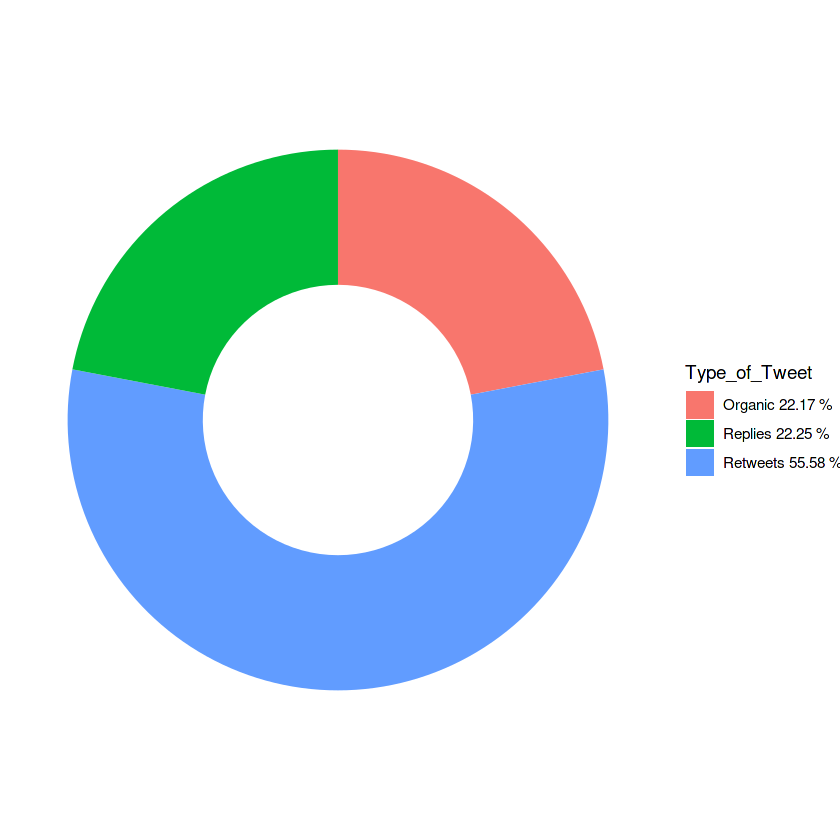

In [38]:
# Adding columns
data_google2$fraction = data_google2$count / sum(data_google2$count)
data_google2$percentage = data_google2$count / sum(data_google2$count) * 100
data_google2$ymax = cumsum(data_google2$fraction)
data_google2$ymin = c(0, head(data_google2$ymax, n=-1))
# Rounding the data to two decimal points
data_google2[,-1] <- round(data_google2[,-1], 2)
# Specify what the legend should say
Type_of_Tweet <- paste(data_google2$category, data_google2$percentage, "%")
ggplot(data_google2, aes(ymax=ymax, ymin=ymin, xmax=4, xmin=3, fill=Type_of_Tweet)) +
  geom_rect() +
  coord_polar(theta="y") + 
  xlim(c(2, 4)) +
  theme_void() +
  theme(legend.position = "right")

In [39]:
data_google2

category,count,fraction,percentage,ymax,ymin
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Organic,266,0.22,22.17,0.22,0.00
Retweets,667,0.56,55.58,0.78,0.22
Replies,267,0.22,22.25,1.00,0.78


###### Frequency of Tweets:

###### Source of Tweets:

In [40]:
#Group tweets per source to check from which source tweets are publish and only letting top 10
google_app2 <- google_tweets %>% 
  select(source) %>% 
  group_by(source) %>%
  summarize(count=n())
google_app2 <-google_app2[order(google_app2$count, decreasing = TRUE),] %>%top_n(10)

google_app2


Selecting by count



source,count
<chr>,<int>
Twitter for iPhone,429
Twitter for Android,348
Twitter Web App,242
Twitter for iPad,34
dlvr.it,21
Salesforce - Social Studio,13
TweetDeck,9
Twitter Web Client,9
Radio.co now playing,8


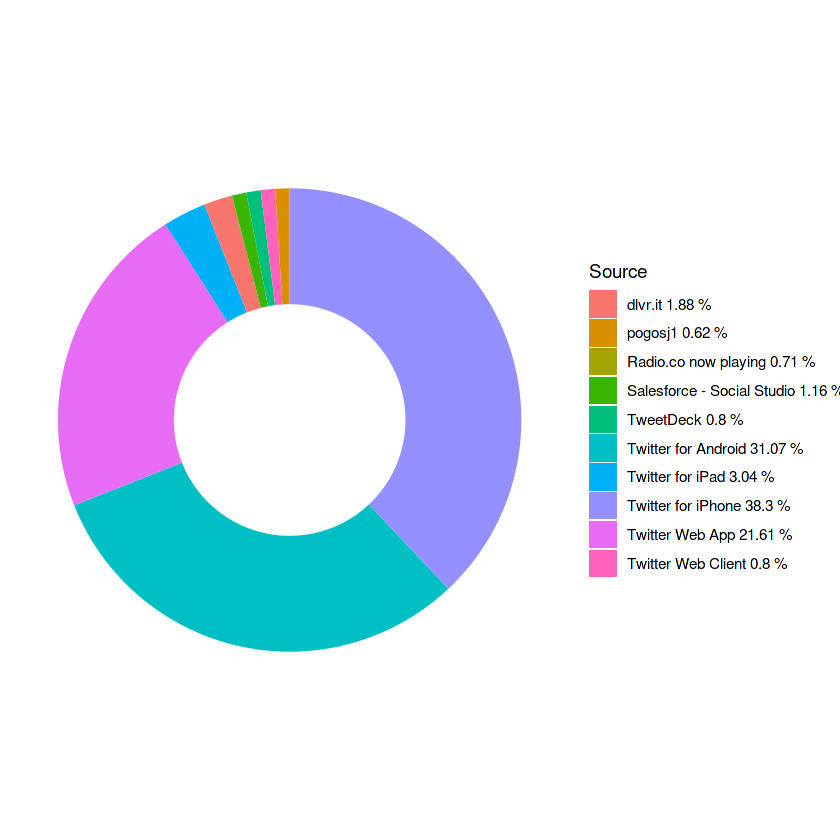

In [41]:
#Create data frame of source count per type
data_google_app2 <- data.frame(
  category=google_app2$source,
  count=google_app2$count
)

#Create statical value and plot the data
data_google_app2$fraction = data_google_app2$count / sum(data_google_app2$count)
data_google_app2$percentage = data_google_app2$count / sum(data_google_app2$count) * 100
data_google_app2$ymax = cumsum(data_google_app2$fraction)
data_google_app2$ymin = c(0, head(data_google_app2$ymax, n=-1))
data_google_app2[,-1] <- round(data_google_app2[,-1], 2)
Source <- paste(data_google_app2$category, data_google_app2$percentage, "%")
ggplot(data_google_app2, aes(ymax=ymax, ymin=ymin, xmax=4, xmin=3, fill=Source)) +
  geom_rect() +
  coord_polar(theta="y") + 
  xlim(c(2, 4)) +
  theme_void() +
  theme(legend.position = "right")

In [42]:
data_google_app2

category,count,fraction,percentage,ymax,ymin
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Twitter for iPhone,429,0.38,38.30,0.38,0.00
Twitter for Android,348,0.31,31.07,0.69,0.38
Twitter Web App,242,0.22,21.61,0.91,0.69
Twitter for iPad,34,0.03,3.04,0.94,0.91
dlvr.it,21,0.02,1.88,0.96,0.94
Salesforce - Social Studio,13,0.01,1.16,0.97,0.96
TweetDeck,9,0.01,0.80,0.98,0.97
Twitter Web Client,9,0.01,0.80,0.99,0.98
Radio.co now playing,8,0.01,0.71,0.99,0.99


### Sentiment analysis of Tweets mentioning Google:

In [43]:
#Sentiment analysis
google_tweetsSentiment <- inner_join(google_tweets_tokenized,get_sentiments("bing"))

head(google_tweetsSentiment)
nrow(google_tweetsSentiment)

Joining, by = "word"



status_id,word,n,sentiment
<chr>,<chr>,<int>,<chr>
x1222670521457954827,like,1,positive
x1222670521457954827,super,1,positive
x1222670522980413442,fans,1,positive
x1222670522980413442,free,1,positive
x1222670522980413442,murder,1,negative
x1222670522980413442,slow,1,negative


[1] 1506

In [44]:
#Get the most negative and positive words

google_Tweets_Sentiment_summary <- google_tweetsSentiment %>%  count(word,sentiment,sort=TRUE) %>%
                    group_by(sentiment) %>%
                    top_n(10) %>%  
                    arrange(n) %>%
                    as.data.frame(stringsAsFactors=FALSE)

head(google_Tweets_Sentiment_summary)

Selecting by n



,word,sentiment,n
,<chr>,<chr>,<int>
1,bully,negative,6
2,interference,negative,6
3,lost,negative,6
4,scariest,negative,6
5,undermine,negative,6
6,problem,negative,7


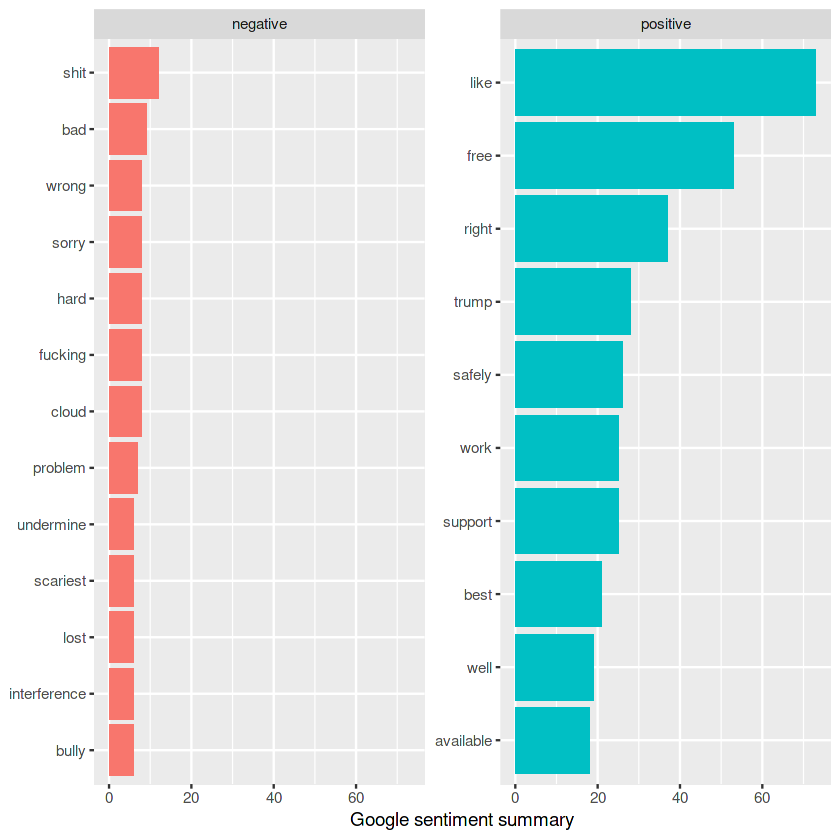

In [45]:
google_Tweets_Sentiment_summary %>%
  ungroup() %>%
  mutate(word = reorder(word, n)) %>%
  ggplot(aes(word, n, fill = sentiment)) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~sentiment, scales = "free_y") +
  labs(y = "Google sentiment summary",
       x = NULL) +
  coord_flip()

###  Content Analysis:

In [96]:
# create topic model:
tweets_about_google_lda <- LDA(tweets_google_DTM, k = 6,method="gibbs",control = list(nstart = 5, burnin = 2000, best = TRUE, seed = 2:6) )

In [97]:
# look at model structure:
str(tweets_about_google_lda)

Formal class 'LDA_Gibbs' [package "topicmodels"] with 16 slots
  ..@ seedwords      : NULL
  ..@ z              : int [1:18043] 3 3 6 2 6 4 2 5 4 2 ...
  ..@ alpha          : num 8.33
  ..@ call           : language LDA(x = tweets_google_DTM, k = 6, method = "gibbs", control = list(nstart = 5,      burnin = 2000, best = TRUE, seed = 2:6))
  ..@ Dim            : int [1:2] 1200 7680
  ..@ control        :Formal class 'LDA_Gibbscontrol' [package "topicmodels"] with 14 slots
  .. .. ..@ delta        : num 0.1
  .. .. ..@ iter         : int 4000
  .. .. ..@ thin         : int 2000
  .. .. ..@ burnin       : int 2000
  .. .. ..@ initialize   : chr "random"
  .. .. ..@ alpha        : num 8.33
  .. .. ..@ seed         : int [1:5] 2 3 4 5 6
  .. .. ..@ verbose      : int 0
  .. .. ..@ prefix       : chr "/tmp/RtmpjB0B8F/filebce4ee49f9b"
  .. .. ..@ save         : int 0
  .. .. ..@ nstart       : int 5
  .. .. ..@ best         : logi TRUE
  .. .. ..@ keep         : int 0
  .. .. ..@ estimate.bet

In [98]:
# terms per topic
tweets_about_google_topics <- tidy(tweets_about_google_lda, matrix = "beta")
head(tweets_about_google_topics)

topic,term,beta
<int>,<chr>,<dbl>
1,bruno,2.658161e-05
2,bruno,2.688895e-05
3,bruno,2.927868e-04
4,bruno,2.619859e-05
5,bruno,2.625361e-05
6,bruno,2.640613e-05


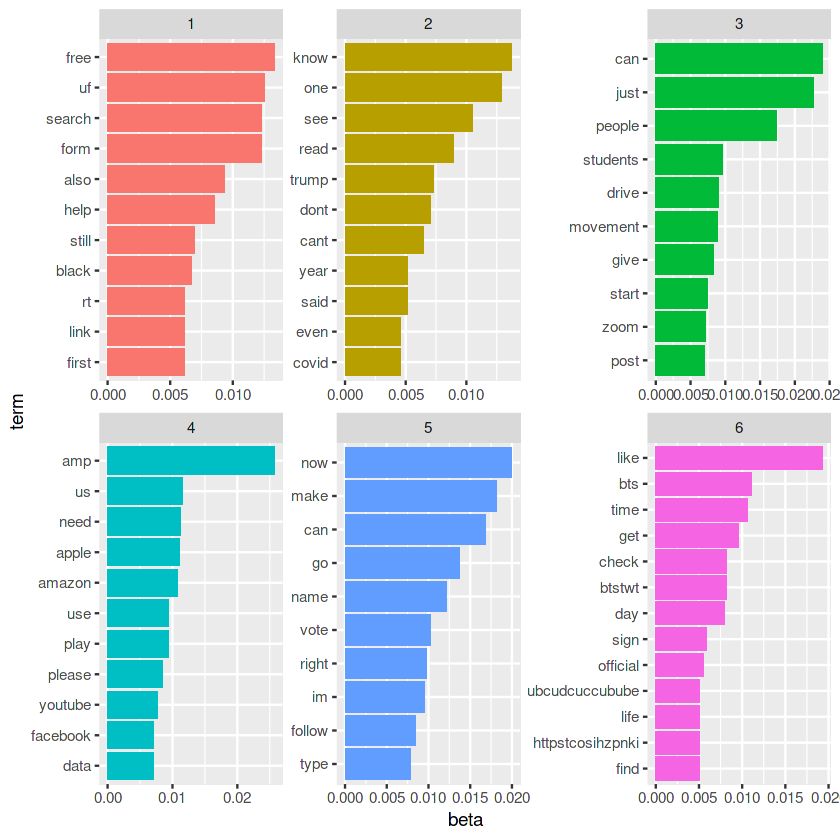

In [99]:
# visualize this

# you can use the following code to get the top terms per topic
tweets_about_google_top_terms <- tweets_about_google_topics  %>%
  group_by(topic) %>%
  top_n(10, beta) %>%
  ungroup() %>%
  arrange(topic, -beta)


tweets_about_google_top_terms %>%
  mutate(term = reorder_within(term, beta, topic)) %>%
  ggplot(aes(term, beta, fill = factor(topic))) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~ topic, scales = "free") +
  coord_flip() +
  scale_x_reordered()

In [100]:
tweets_about_google_documents <- tidy(tweets_about_google_lda, matrix = "gamma")
# Choose, per tweet, the most important topic (the one with the highest weight)
tweets_about_google_topic <-tweets_about_google_documents %>%
  group_by(document) %>%
  arrange(desc(gamma)) %>%
  slice(1) 

tweets_about_google_topic %>%
  group_by(topic) %>% 
  summarise(nbr_documents = n())

,topic,nbr_documents
,<int>,<int>
1,1,290
2,2,239
3,3,194
4,4,165
5,5,154
6,6,158
